# Random Forest
- 기준값을 정할 때 쓴다.
- tree가 많이 모여있을 때 Forest가 되듯

In [228]:
# Ensemble(앙상블 기법) : Model 여럿을 같이 엮어서 사용하는 방법. 예측력이 굉장히 높다

In [229]:
library(randomForest)
library(party)

In [230]:
# Sampling
set.seed(1234)
library(caret) # createDataPartition 함수 쓰기
samp <- createDataPartition(iris$Species, p=0.7, list=F)
summary(samp)
# 학습용 데이터 만들기
data.tr <- iris[samp,]
summary(data.tr)
# 검증용 데이터 만들기
data.test <- iris[-samp,]
summary(data.test)
# 문제 및 정답 만들기
x <- subset(data.test, select=-Species)
y <- data.test$Species

   Resample1     
 Min.   :  2.00  
 1st Qu.: 40.00  
 Median : 79.00  
 Mean   : 75.75  
 3rd Qu.:110.00  
 Max.   :147.00  

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.847   Mean   :3.042   Mean   :3.749   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.00   Min.   :0.100   setosa    :15  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.300   versicolor:15  
 Median :5.800   Median :3.100   Median :4.70   Median :1.400   virginica :15  
 Mean   :5.836   Mean   :3.093   Mean   :3.78   Mean   :1.222                  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.10   3rd Qu.:1.900                  
 Max.   :7.700   Max.   :4.100   Max.   :6.70   Max.   :2.500                  

In [231]:
# 학습하기, RandomForest
model.rf <- randomForest(Species~., data=data.tr, ntree=100)

In [232]:
# 검증하기
pred <- predict(model.rf, x)

In [233]:
# 예측력과 정오표(오분류표)
mean(pred == y)
table(pred,y)

[1] 0.9333333

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

> 앙상블 기법 중에 완성도가 제일 높은 RandomForest, 파이썬에서 많이 쓰인다

---
### 교통사교 예측하기, 회귀식과 RandomForest

In [234]:
seoul <- read.csv('../data/newSeoul2019.csv')
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [235]:
summary(seoul)

      년도            월           자치구명       발생건수        사망자수     
 Min.   :2011   Min.   : 1.00   강남구 : 108   Min.   : 45.0   Min.   : 0.000  
 1st Qu.:2013   1st Qu.: 3.75   강동구 : 108   1st Qu.:100.0   1st Qu.: 0.000  
 Median :2015   Median : 6.50   강북구 : 108   Median :122.0   Median : 1.000  
 Mean   :2015   Mean   : 6.50   강서구 : 108   Mean   :133.3   Mean   : 1.207  
 3rd Qu.:2017   3rd Qu.: 9.25   관악구 : 108   3rd Qu.:149.0   3rd Qu.: 2.000  
 Max.   :2019   Max.   :12.00   광진구 : 108   Max.   :383.0   Max.   :10.000  
                                (Other):2052                                   
    부상자수    
 Min.   : 55.0  
 1st Qu.:138.0  
 Median :168.0  
 Mean   :187.4  
 3rd Qu.:208.0  
 Max.   :552.0  
                

In [236]:
# 자치구명, 종로구 데이터셋 만들기
JongRo <- subset(seoul, 자치구명=='종로구')
JongRo$자치구명 <- factor(JongRo$자치구명)
rownames(JongRo) <- c()
summary(JongRo)
str(JongRo)

      년도            월          자치구명      발생건수        사망자수     
 Min.   :2011   Min.   : 1.00   종로구:108   Min.   : 66.0   Min.   :0.0000  
 1st Qu.:2013   1st Qu.: 3.75                1st Qu.: 96.0   1st Qu.:0.0000  
 Median :2015   Median : 6.50                Median :108.0   Median :1.0000  
 Mean   :2015   Mean   : 6.50                Mean   :107.0   Mean   :0.8519  
 3rd Qu.:2017   3rd Qu.: 9.25                3rd Qu.:119.5   3rd Qu.:1.0000  
 Max.   :2019   Max.   :12.00                Max.   :151.0   Max.   :3.0000  
    부상자수    
 Min.   : 84.0  
 1st Qu.:133.0  
 Median :149.0  
 Mean   :148.4  
 3rd Qu.:166.2  
 Max.   :204.0  

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 1 level "종로구": 1 1 1 1 1 1 1 1 1 1 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


[1] 0.9208914

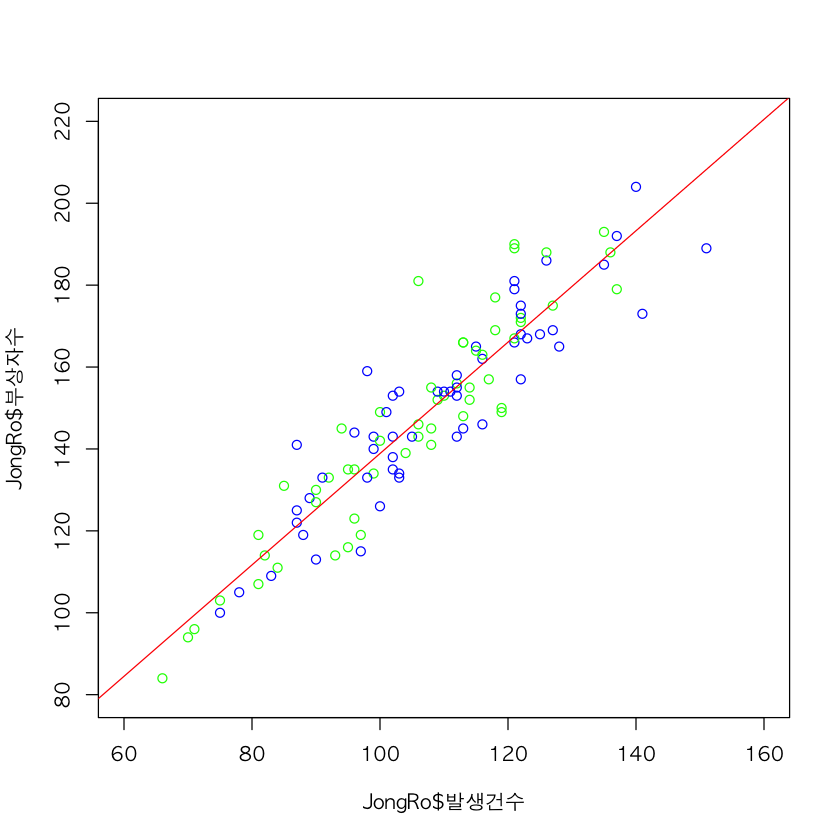

In [237]:
# 종로의 발생건수와 부상자수 상관계수
cor(JongRo$발생건수,JongRo$부상자수)
# 종로구의 발생건수와 부상자수 산포도와 회귀선 그리기
options(warn=-1,scipen=100)

par(family="AppleGothic")
plot(JongRo$부상자수~JongRo$발생건수,
  ylim=c(80,220),
  xlim=c(60,160),
  col=c('blue','green')
)
r<-lm(JongRo$부상자수~JongRo$발생건수)
abline(r,col='red')

In [238]:
# 예측력
summary(r)


Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.637  -5.949  -0.019   5.301  33.961 

Coefficients:
                Estimate Std. Error t value            Pr(>|t|)    
(Intercept)      2.88612    6.05535   0.477               0.635    
JongRo$발생건수  1.35993    0.05591  24.322 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.816 on 106 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8466 
F-statistic: 591.6 on 1 and 106 DF,  p-value: < 0.00000000000000022


> 예측력, Adjusted R-squared:  0.8466

In [239]:
# 회귀식
r


Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수)

Coefficients:
    (Intercept)  JongRo$발생건수  
          2.886            1.360  


In [251]:
# 발생건수가 100건일 경우의 부상자수 예측
cat('발생건수가 100건일 때 부상자수 :',1.360*100-9.816,'~',1.360*100+9.816,'\n') # summary와 값이 약간 다름
cat('발생건수가 145건일 때 부상자수 :',1.360*145-9.816,'~',1.360*145+9.816,'\n') # summary와 값이 약간 다름
cat('발생건수가 150건일 때 부상자수 :',1.360*150-9.816,'~',1.360*150+9.816,'\n') # summary와 값이 약간 다름
cat('발생건수가 085건일 때 부상자수 :',1.360*85-9.816,'~',1.360*85+9.816,'\n') # summary와 값이 약간 다름
cat('발생건수가 200건일 때 부상자수 :',1.360*200-9.816,'~',1.360*200+9.816,'\n') # summary와 값이 약간 다름

발생건수가 100건일 때 부상자수 : 126.184 ~ 145.816 
발생건수가 145건일 때 부상자수 : 187.384 ~ 207.016 
발생건수가 150건일 때 부상자수 : 194.184 ~ 213.816 
발생건수가 085건일 때 부상자수 : 105.784 ~ 125.416 
발생건수가 200건일 때 부상자수 : 262.184 ~ 281.816 


In [246]:
# Random Forest 예측 : intercept, bias 판단하기
x1 <- list(발생건수=100)
x2 <- list(발생건수=145)
x3 <- list(발생건수=150)
x4 <- list(발생건수=85)
x5 <- list(발생건수=200)

In [247]:
# 학습하기, RandomForest
model.rf1 <- randomForest(부상자수~발생건수, data=JongRo, ntree=1000)
model.rf1


Call:
 randomForest(formula = 부상자수 ~ 발생건수, data = JongRo,      ntree = 1000) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 1

          Mean of squared residuals: 122.8047
                    % Var explained: 80.27

In [248]:
# 검증하기
pred1 <- predict(model.rf1, x1)
pred1
pred2 <- predict(model.rf1, x2)
pred2
pred3 <- predict(model.rf1, x3)
pred3
pred4 <- predict(model.rf1, x4)
pred4
pred5 <- predict(model.rf1, x5)
pred5

1 
139.3156

1 
184.9632

1 
185.4809

1 
124.6015

1 
185.4809

> 딥러닝은 데이터가 많아야 쓸모있다, 비교적 데이터가 적을 때에는 회귀식을 쓰는 것이 낫다.